In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
df.shape

(1000, 8)

#  Checking statistics of data set

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# From above description all means are very close to each other: Between 66 and 69.16
# All standard deviations are also close to each other: Between 14.60 and 15.19
# Minimum score for math is 0, Minimum score for reading is 17, Minimum score for writing is 10

# Checking Data Types

In [6]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Checking Missing Values

In [7]:
df.isnull().sum() #There are no missing values in the data set.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Checking Duplicates

In [8]:
df.duplicated().sum()

0

# Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Print numerical and categorical columns

In [10]:
# Define numerical & categorical columns
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']

# print columns
print('We have {} numerical columns(features) : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns(features) : {}'.format(len(categorical_columns), categorical_columns))

We have 3 numerical columns(features) : ['math score', 'reading score', 'writing score']

We have 5 categorical columns(features) : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# Adding 'Total' and 'Average' Columns

In [11]:
df['total score']= df['math score'] + df['reading score'] + df['writing score']
df['avg score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Counting the total number of students who obtained full marks in Mathematics, Reading, and Writing.

In [12]:
math_full_score = df[df['math score']==100]['math score'].count()
reading_full_score = df[df['reading score']==100]['reading score'].count()
writing_full_score =  df[df['writing score']==100]['writing score'].count()

print(f'Number of students with full marks in Maths: {math_full_score }')
print(f'Number of students with full marks in Reading: {reading_full_score}')
print(f'Number of students with full marks in Writing: {writing_full_score}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


# Counting the total number of students who scored less than 25 marks in Mathematics, Reading, and Writing.

In [13]:
math_less_25 = df[df['math score'] <= 25]['math score'].count()
reading_less_25 = df[df['reading score'] <= 25]['reading score'].count()
writing_less_25 = df[df['writing score'] <= 25]['writing score'].count()


print(f'Number of students with less than 25 marks in Maths: {math_less_25}')
print(f'Number of students with less than 25 marks in Reading: {reading_less_25}')
print(f'Number of students with less than 25 marks in Writing: {writing_less_25}')

Number of students with less than 25 marks in Maths: 7
Number of students with less than 25 marks in Reading: 4
Number of students with less than 25 marks in Writing: 5


# From above values we get students have performed the worst in Maths
# Best performance is in reading section

# Gender Distribution

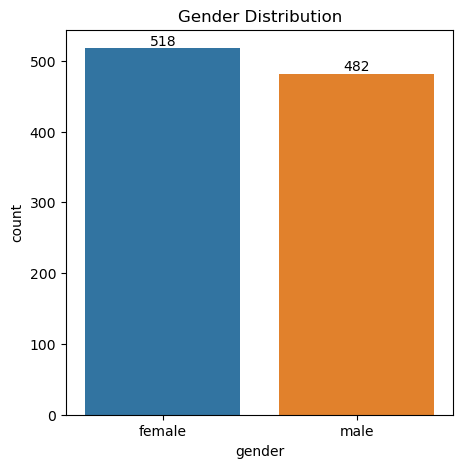

In [14]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x="gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

# Gender wise Average Score, Math Score, Reading Score, Writing Score distribution

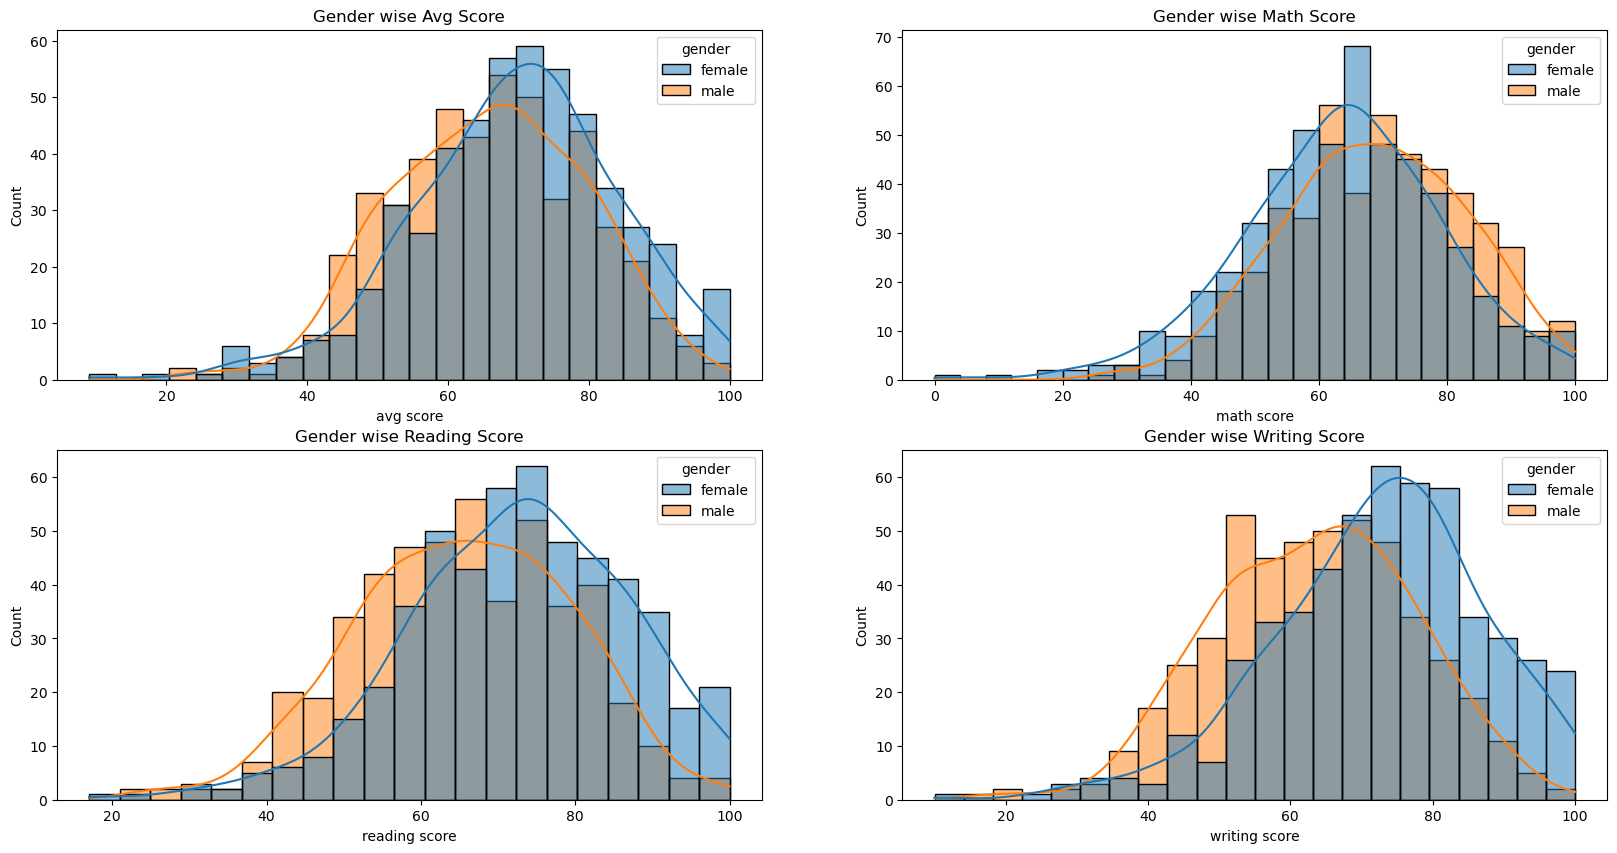

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.histplot(data=df,x='avg score',kde=True,hue='gender',ax=axs[0, 0])
axs[0, 0].set_title('Gender wise Avg Score')

sns.histplot(data=df,x='math score',kde=True,hue='gender',ax=axs[0, 1])
axs[0, 1].set_title('Gender wise Math Score')

sns.histplot(data=df,x='reading score',kde=True,hue='gender',ax=axs[1, 0])
axs[1, 0].set_title('Gender wise Reading Score')

sns.histplot(data=df,x='writing score',kde=True,hue='gender',ax=axs[1, 1])
axs[1, 1].set_title('Gender wise Writing Score')

plt.show()

In [16]:
# Female students tend to perform well then male students

# Lunch Group wise Score Distribution

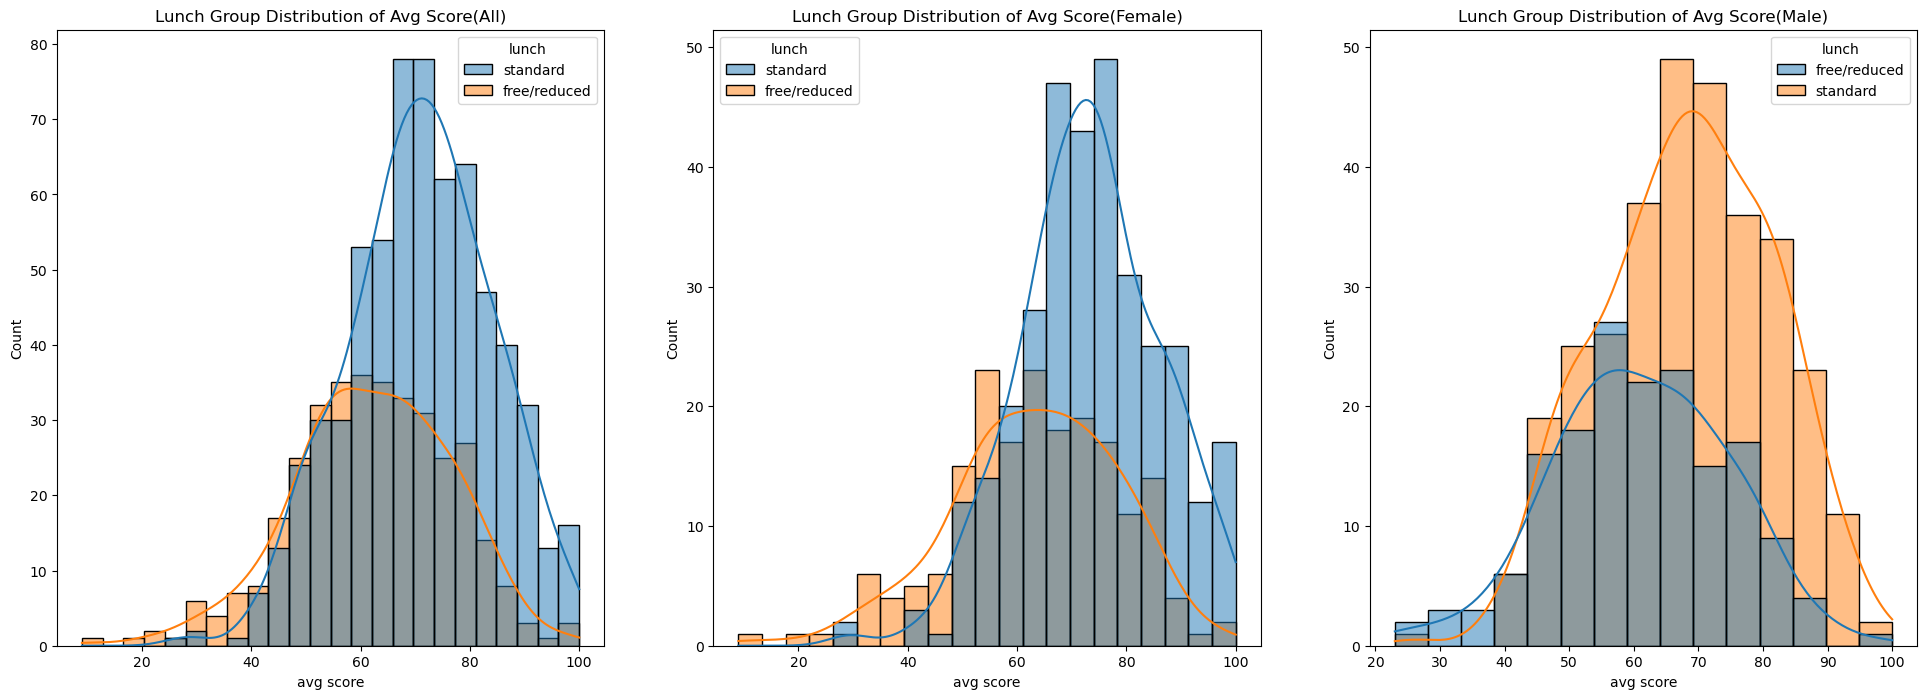

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

axs[0].set_title('Lunch Group Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='lunch', ax=axs[0])

axs[1].set_title('Lunch Group Distribution of Avg Score(Female)')
sns.histplot(data=df[df.gender=='female'], x='avg score', kde=True, hue='lunch', ax=axs[1])

axs[2].set_title('Lunch Group Distribution of Avg Score(Male)')
sns.histplot(data=df[df.gender=='male'], x='avg score', kde=True, hue='lunch', ax=axs[2])

plt.show()

# Standard lunch helps perform well in exams.
# Standard lunch helps perform well in exams be it a male or a female.

# score of students in all three subjects

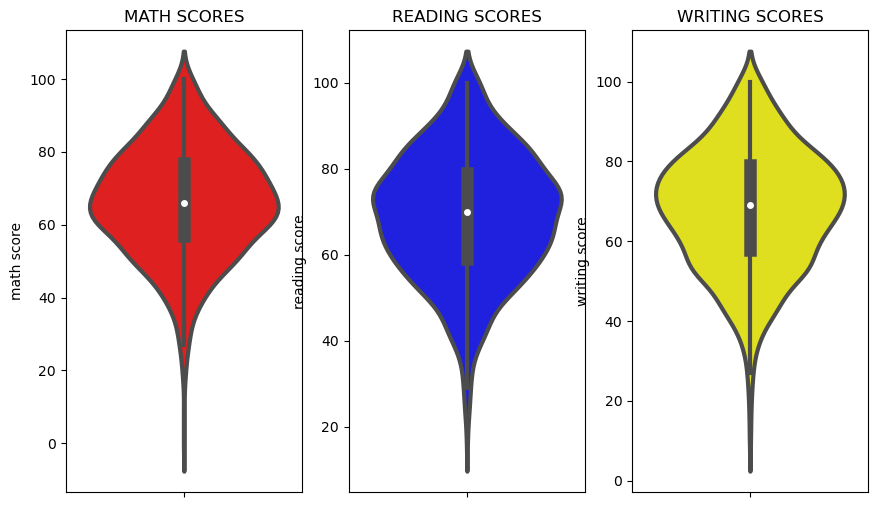

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1) 
plt.title("MATH SCORES")
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2) 
plt.title("READING SCORES")
sns.violinplot(y='reading score',data=df,color='blue',linewidth=3)
plt.subplot(1, 4, 3) 
plt.title("WRITING SCORES")
sns.violinplot(y='writing score',data=df,color='yellow',linewidth=3)
plt.show()

# Majority of students'- 
#  Writing scores are between 60-80
#  Maths scores are between 60-70
#  Reading scores are between 60-80

# Race/ethnicity wise Score Distribution

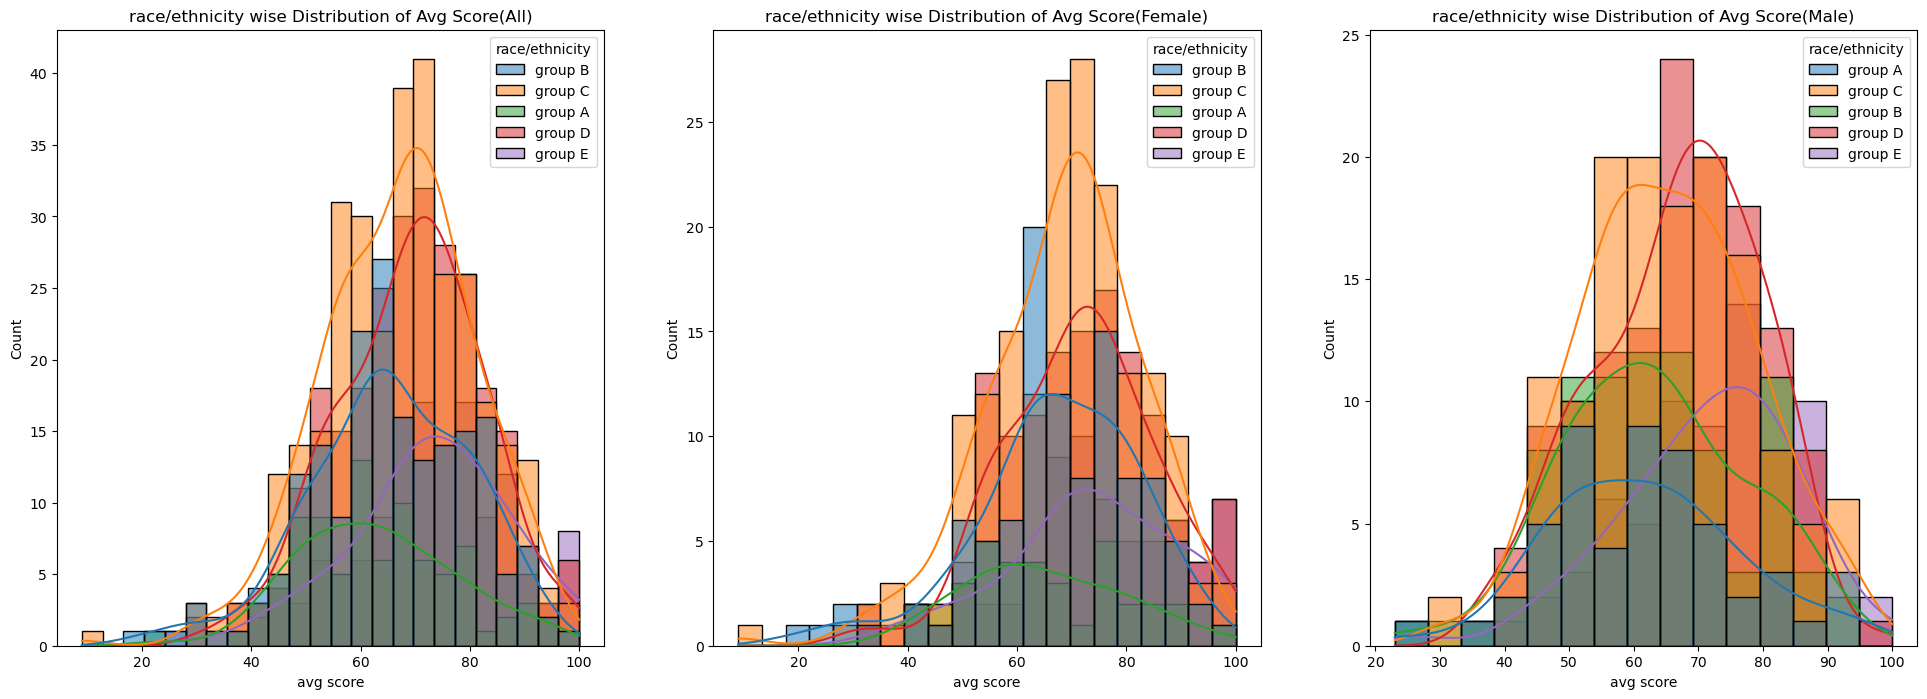

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

axs[0].set_title('race/ethnicity wise Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='race/ethnicity', ax=axs[0])

axs[1].set_title('race/ethnicity wise Distribution of Avg Score(Female)')
sns.histplot(data=df[df.gender=='female'], x='avg score', kde=True, hue='race/ethnicity', ax=axs[1])

axs[2].set_title('race/ethnicity wise Distribution of Avg Score(Male)')
sns.histplot(data=df[df.gender=='male'], x='avg score', kde=True, hue='race/ethnicity', ax=axs[2])

plt.show()

In [20]:
# Students of group A and group B tends to perform poorly in exam.
# Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#  Parental level of education wise Score Distribution

In [21]:
gb=df.groupby("parental level of education").agg({"math score":"mean","reading score":"mean","writing score":"mean"})
print(gb)

                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


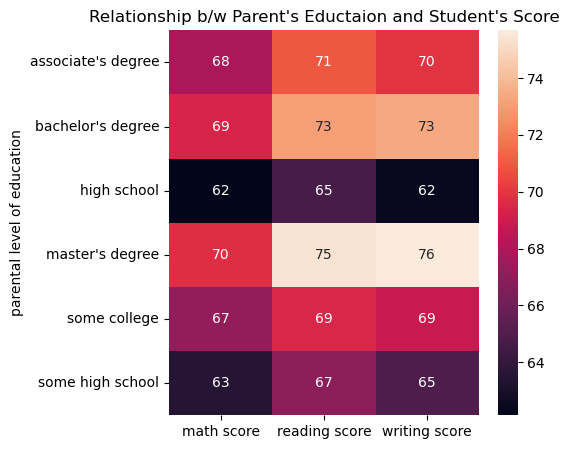

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot=True) #lighter shade higher value 
plt.title("Relationship b/w Parent's Eductaion and Student's Score")
plt.show()

# From the above heatmap we have analysed that-

# Someone's Parents who have done master's degree have higher average scores

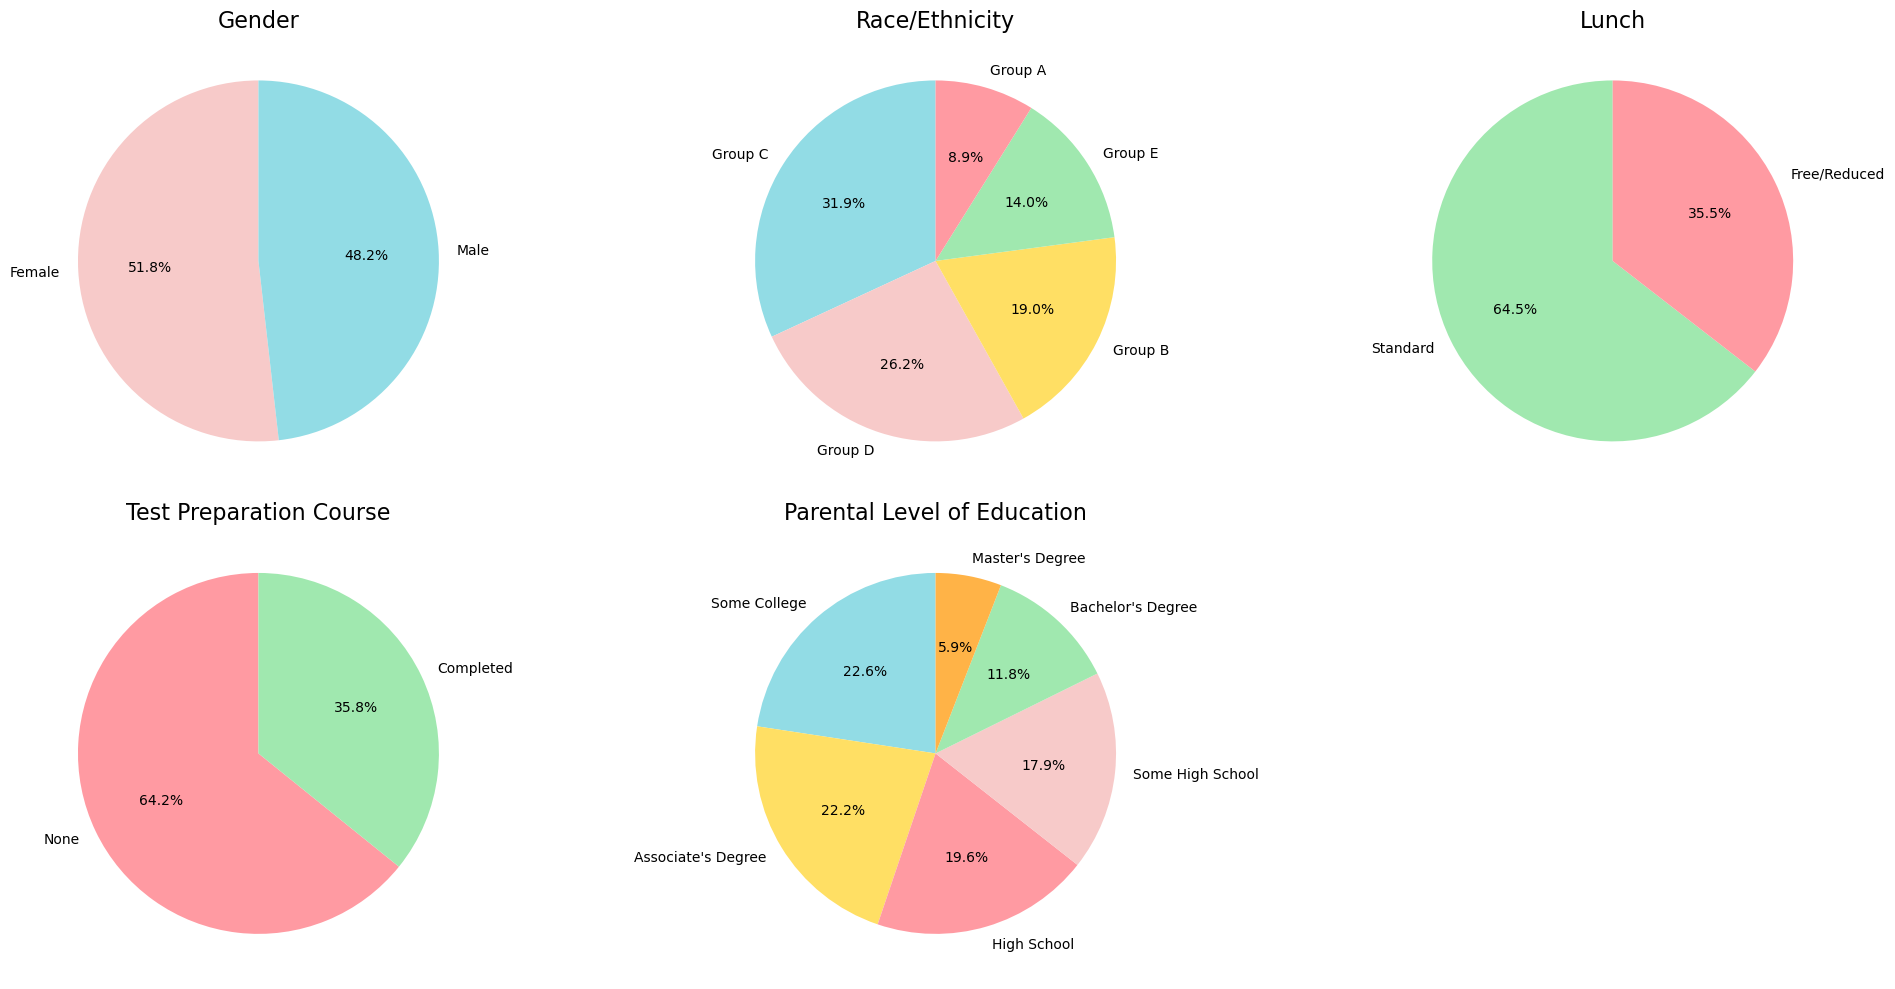

In [23]:
plt.figure(figsize=(20, 10))

# Gender
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#F7CAC9', '#92DCE5']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Gender',fontsize=16)

# Race/Ethnicity
plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['#92DCE5', '#F7CAC9', '#FFDF64', '#A0E8AF', '#FF9AA2']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Race/Ethnicity',fontsize=16)

# Lunch
plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free/Reduced']
colors = ['#A0E8AF', '#FF9AA2']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Lunch',fontsize=16)

# Test Preparation Course
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = ['None', 'Completed']
colors = ['#FF9AA2', '#A0E8AF']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Test Preparation Course',fontsize=16)

# Parental Level of Education
plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = ["Some College", "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"]
colors = ['#92DCE5', '#FFDF64', '#FF9AA2', '#F7CAC9', '#A0E8AF', '#FFB347']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Parental Level of Education',fontsize=16)

plt.tight_layout()
plt.show()


# 1) Gender wise Number of Male and Female students is almost equal
# 2) Race/Ethnicity wise Number students are greatest in Group C
# 3) Lunch wise Number of students who have standard lunch are greater
# 4) Test Preparation Course wise Number of students who have not enrolled in any test preparation course is greater
# 5) Parental Level of Education wise Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# ---- Checking Outliers

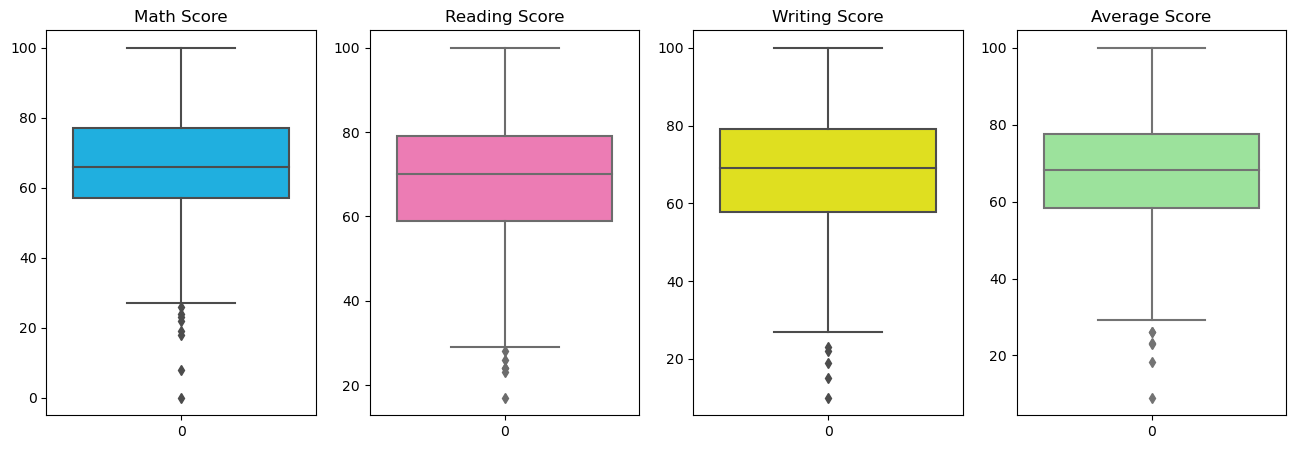

In [24]:
# Define modern color palettes
skyblue = "#00BFFF"
hotpink = "#FF69B4"
yellow = "#FFFF00"
lightgreen = "#90EE90"

# Create subplots with specified figure size
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

# Plot boxplots for each score column and set color using the defined palettes
sns.boxplot(df['math score'], color=skyblue, ax=axs[0])
sns.boxplot(df['reading score'], color=hotpink, ax=axs[1])
sns.boxplot(df['writing score'], color=yellow, ax=axs[2])
sns.boxplot(df['avg score'], color=lightgreen, ax=axs[3])

# Set titles for each subplot
axs[0].set_title('Math Score')
axs[1].set_title('Reading Score')
axs[2].set_title('Writing Score')
axs[3].set_title('Average Score')

# Show the plot
plt.show()

# Preparing X and Y variables

In [25]:
X=df.drop(columns=['total score','avg score','math score'])
print(X.shape)
X.head()

(1000, 7)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [26]:
Y = df['math score']
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

# Create Column Transformer with 3 types of transformers

In [27]:
# Create Column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer #used to apply different preprocessing steps to different columns of the DataFrame.

numeric_transformer = StandardScaler() # This transformer standardizes numerical features by removing the mean and scaling to unit variance.
oh_transformer = OneHotEncoder() #It creates binary columns for each category in the categorical feature.

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [28]:
X = preprocessor.fit_transform(X) #Learns the parameters for the transformations from the data. Applies the learned transformations to the data.
X.shape

(1000, 19)

# Separate dataset into train and test

In [29]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# MODEL TRAINING 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
}

# Train and evaluate models
model_list = []
r2_list = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate model performance
    model_train_r2 = r2_score(Y_train, Y_train_pred)
    model_test_r2 = r2_score(Y_test, Y_test_pred)
    
    # Print model name and performance
    print(name)
    print('Model performance for Training set')
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('                                          ')
    print('Model performance for Test set')
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print('='*35)
    print('\n')
    
    # Append results to lists
    model_list.append(name)
    r2_list.append(model_test_r2)


Linear Regression
Model performance for Training set
- R2 Score: 0.8743
                                          
Model performance for Test set
- R2 Score: 0.8804


K-Neighbors Regressor
Model performance for Training set
- R2 Score: 0.8554
                                          
Model performance for Test set
- R2 Score: 0.7839


Decision Tree
Model performance for Training set
- R2 Score: 0.9997
                                          
Model performance for Test set
- R2 Score: 0.7439


Random Forest Regressor
Model performance for Training set
- R2 Score: 0.9758
                                          
Model performance for Test set
- R2 Score: 0.8509




# Linear Regression

In [31]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


# Plot Y_pred and Y_test

# Regression Plot of Actual vs. Predicted

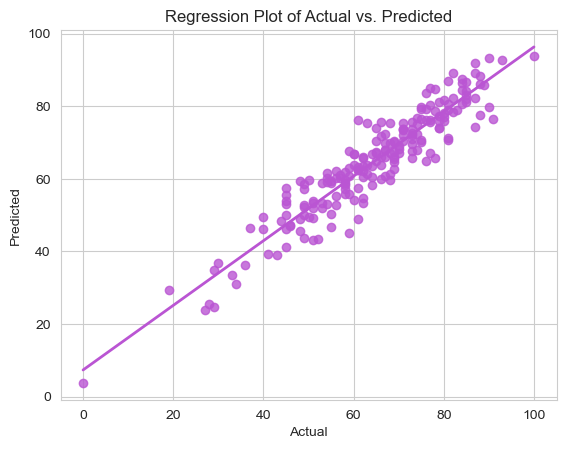

In [32]:
# Create the regression plot
sns.set_style('whitegrid')
sns.regplot(x=Y_test, y=Y_pred, ci=None, color='mediumorchid', line_kws={'lw':2})

# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs. Predicted')

plt.show()

# Difference between Actual and Predicted Values

In [33]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_pred,'Difference':Y_test-Y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
